# SLOAN DIGITAL SKY SURVEY ANALYSIS


## Overview

In this project, we worked on Sloan Digital Sky Survey(SDSS) sky observation data. Normally it is possible to query the SDSS database server to retrieve newest data: <br>
http://skyserver.sdss.org/dr12/en/tools/search/sql.aspx 

But we couldn't find a package to handle this retrieval through Python(All of them are deprecated). So we decided to take data from Kaggle. You can find additional information about the data here: <br>
https://www.kaggle.com/lucidlenn/sloan-digital-sky-survey/home 

First, we analyzed the data and did the necessary transformation, normalization on it. Then, we did some visualization and implementation of supervised algorithms to classify given data whether it is a Star, Quasar or Galaxy using many classification algorithms such as KNN, Decision Tree, SVM and LightGBM. We checked the accuracies of them. 

<br>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats.stats import pearsonr
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv("Skyserver_SQL2_27_2018 6_51_39 PM.csv")

In [4]:
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


### Data explanation: 
The data is collected from the joint of 2 table. (PhotoObj ve SpecObj)<br>
__PhotoObj__ has photometric data that is related to light.<br>
__SpecObj__ has spectral data related to the interaction of matter and electromagnetic radiation.<br>
__objid__ = object identifier<br>
A system, called equatorial coordinates, is used on the sky sphere based on the poles of the Earth and its equator. This system is fixed to the stars. It does not resemble horizon coordinates, so the position of a star does not depend on the observer's time. Therefore, astronomers prefer this system. In order to determine the position of an object in the sky sphere, it is necessary to first determine the __angular position(ra)__ along the sky equator. This is coordinate rectification (right-opening/right-ascension).<br>
__u,g,r,i,z__ are the magnitudes of the objects in the SDSS. (These represent the fluxes of light measured in logarithmic units, through various wavebands from the ultraviolet to the infrared.)<br>
__run, rerun, camcol and field__ are features which describe a field within an image taken by the SDSS. A field is basically a part of the entire image corresponding to 2048 by 1489 pixels.<br>
__redshift__ The wavelength of the light is stretched, so the light is seen as 'shifted' towards the red part of the spectrum.Redshift in cosmology is usually labeled as 'z'. It is unit-less because you divide the units out when you compare the observed wavelength to the known source wavelength.<br><br>
  
    


In [5]:
data.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,0.000000e+00,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [6]:
data.min()

objid        1.23765e+18
ra                8.2351
dec             -5.38263
u                 12.989
g                12.7995
r                12.4316
i                11.9472
z                11.6104
run                  308
rerun                301
camcol                 1
field                 11
specobjid    2.99578e+17
class             GALAXY
redshift     -0.00413608
plate                266
mjd                51578
fiberid                1
dtype: object

In [7]:
data.nunique()

objid            1
ra           10000
dec          10000
u             9730
g             9817
r             9852
i             9890
z             9896
run             23
rerun            1
camcol           6
field          703
specobjid     6349
class            3
redshift      9637
plate          487
mjd            355
fiberid        892
dtype: int64

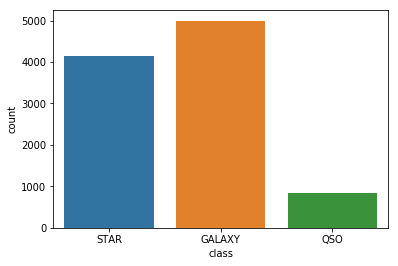

In [8]:
ax = sns.countplot(x="class", data=data)

<br><br>__We can see the correlation among all the variables and visualize it with a heatmap:__


,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
objid,1.000000e+00,2.524419e-14,-1.937483e-15,5.581214e-14,1.001149e-13,2.995673e-14,2.212198e-14,-4.107700e-14,-1.553011e-14,NaN,1.921887e-15,5.938881e-16,-1.829075e-15,5.085882e-16,4.156934e-16,-3.317582e-15,4.665195e-15
ra,2.524419e-14,1.000000e+00,3.596046e-03,3.123756e-02,4.390863e-02,4.710290e-02,4.573107e-02,4.294957e-02,-9.274056e-02,NaN,-6.293831e-03,5.946996e-01,-9.532711e-02,3.030740e-02,-9.532933e-02,-8.688726e-02,5.748482e-02
dec,-1.937483e-15,3.596046e-03,1.000000e+00,3.527932e-02,6.187471e-02,6.340395e-02,5.829189e-02,5.687030e-02,7.783849e-01,NaN,1.146139e-01,-1.314714e-01,8.834533e-02,6.702076e-02,8.834153e-02,6.614663e-02,1.550124e-01
u,5.581214e-14,3.123756e-02,3.527932e-02,1.000000e+00,8.492320e-01,6.923790e-01,6.026302e-01,5.514828e-01,3.822910e-02,NaN,9.944672e-03,8.547880e-03,-1.294293e-01,1.637409e-01,-1.294304e-01,-1.687927e-01,1.130112e-02
g,1.001149e-13,4.390863e-02,6.187471e-02,8.492320e-01,1.000000e+00,9.581062e-01,9.074187e-01,8.796222e-01,5.844630e-02,NaN,1.022304e-02,1.465110e-02,-5.497908e-02,4.075763e-01,-5.498078e-02,-9.277155e-02,4.718739e-02
r,2.995673e-14,4.710290e-02,6.340395e-02,6.923790e-01,9.581062e-01,1.000000e+00,9.776718e-01,9.691967e-01,5.726060e-02,NaN,1.074725e-02,1.713294e-02,1.978831e-02,4.410797e-01,1.978671e-02,-9.344506e-03,6.108141e-02
i,2.212198e-14,4.573107e-02,5.829189e-02,6.026302e-01,9.074187e-01,9.776718e-01,1.000000e+00,9.815066e-01,4.976478e-02,NaN,1.346079e-02,1.978147e-02,7.295994e-02,4.314500e-01,7.295843e-02,5.089616e-02,6.997739e-02
z,-4.107700e-14,4.294957e-02,5.687030e-02,5.514828e-01,8.796222e-01,9.691967e-01,9.815066e-01,1.000000e+00,4.825225e-02,NaN,1.092981e-02,1.824845e-02,1.123981e-01,4.240342e-01,1.123969e-01,9.565845e-02,6.797999e-02
run,-1.553011e-14,-9.274056e-02,7.783849e-01,3.822910e-02,5.844630e-02,5.726060e-02,4.976478e-02,4.825225e-02,1.000000e+00,NaN,1.518143e-01,-4.638975e-01,9.360436e-02,5.905595e-02,9.360107e-02,7.035433e-02,1.385659e-01
rerun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


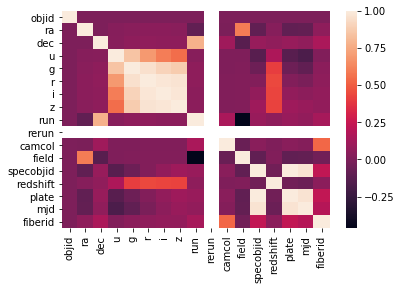

In [9]:
sns.heatmap(data.corr())
data.corr()

<br>__This graphic above shows the correlation between attributes. <br>
The lighter the color of the cell gets, the higher correlation it exists.__

In [10]:
def correlation():
    att1 = input("Enter first attribute: ")
    att2 = input("Enter second attribute: ")
    print(data[att1].corr(data[att2]))
correlation()

Enter first attribute: u
Enter second attribute: g
0.8492320281630625


<br>__We have to convert our class attribute to numerical variable:__

In [11]:
def convert_to_int(x):
    if x == "STAR":
        return 1
    elif x == "GALAXY":
        return 2
    elif x == "QSO":
        return 3
    
data['class'] = data['class'].apply(lambda x: convert_to_int(x))
data.head(10)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,1,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,1,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,2,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,1,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,1,0.000590,3306,54922,512
5,1.237650e+18,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,3.649550e+17,1,0.000315,324,51666,594
6,1.237650e+18,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,3.232870e+17,2,0.100242,287,52023,559
7,1.237650e+18,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,3.722370e+18,1,0.000315,3306,54922,515
8,1.237650e+18,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,3.638290e+17,1,0.000089,323,51615,595
9,1.237650e+18,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,3.243690e+17,2,0.040508,288,52000,400


<br><br>__We can see whether the dataframe has missing values:__

In [12]:
columns = data.columns
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_data = pd.DataFrame({'column_name': columns,
                                   'percent_missing': percent_missing})
missing_value_data.sort_values('percent_missing')

,column_name,percent_missing
objid,objid,0.0
plate,plate,0.0
redshift,redshift,0.0
class,class,0.0
specobjid,specobjid,0.0
field,field,0.0
camcol,camcol,0.0
rerun,rerun,0.0
run,run,0.0
z,z,0.0


<br><br>__Since ID is not important for us, we will drop it. <br>
The attributes that have same values in all rows also be dropped out.__

In [13]:
data.drop(['specobjid','fiberid'],axis=1,inplace=True)
data.drop(['objid','rerun','camcol'],axis=1,inplace=True)
data.head(10)

,ra,dec,u,g,r,i,z,run,field,class,redshift,plate,mjd
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,267,1,-0.000009,3306,54922
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,267,1,-0.000055,323,51615
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,268,2,0.123111,287,52023
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,269,1,-0.000111,3306,54922
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,269,1,0.000590,3306,54922
5,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,269,1,0.000315,324,51666
6,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,269,2,0.100242,287,52023
7,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,269,1,0.000315,3306,54922
8,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,270,1,0.000089,323,51615
9,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,270,2,0.040508,288,52000


### Machine Learning Part

c:\users\asuss\appdata\local\programs\python\python35\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


KNN score: 0.9088

KNN score: 0.8988

KNN score: 0.9076

KNN score: 0.9108

KNN score: 0.9052

KNN score: 0.91

KNN score: 0.9048

KNN score: 0.9056

KNN score: 0.9056

KNN score: 0.9072

KNN score: 0.902

KNN score: 0.904

KNN score: 0.9036

KNN score: 0.9032

KNN score: 0.8996

KNN score: 0.8992

KNN score: 0.8964

KNN score: 0.8952

KNN score: 0.8972

KNN score: 0.8956

KNN score: 0.8956

KNN score: 0.8972

KNN score: 0.892

KNN score: 0.8948



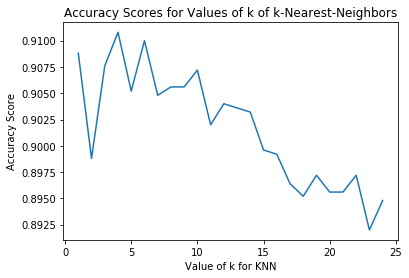

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

all_accuracies = []

X = data.drop(['class'],axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_range = list(range(1,25))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k) # Choose classifier
    KNN_fit = knn.fit(X_train_scaled, y_train) # Train classifier
    accuracy = KNN_fit.score(X_test_scaled, y_test) # Estimate the accuracy of the classifier on future data
    print ('KNN score: {}\n'.format(accuracy))
    scores.append(accuracy)
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

all_accuracies.append(max(scores))

<br><br>__According to the KNN if we choose k = 4, we will get the best result of approximately 91.1%. <br>
Now let's try with a Decision Tree algorithm:__

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

DTC = DecisionTreeClassifier(max_depth=None).fit(X_train_scaled, y_train)
y_predicted = DTC.predict(X_test_scaled)
conf_mat = confusion_matrix(y_test, y_predicted)
print("Classification with Decision Tree Algorithm\nConfusion Matrix\n\n",conf_mat)
print('\nAccuracy:{0:.3f}\n'.format(accuracy_score(y_test, y_predicted)))
print('Classification Report: \n\n',classification_report(y_test, y_predicted))

all_accuracies.append(accuracy_score(y_test, y_predicted))

Classification with Decision Tree Algorithm
Confusion Matrix

 [[1027    2    0]
 [   4 1230   17]
 [   0   16  204]]

Accuracy:0.984

Classification Report: 

               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1029
           2       0.99      0.98      0.98      1251
           3       0.92      0.93      0.93       220

   micro avg       0.98      0.98      0.98      2500
   macro avg       0.97      0.97      0.97      2500
weighted avg       0.98      0.98      0.98      2500



<br><br> __Decision Tree is much more better algorithm to use..__

Now we will try with a Support Vector Machine Algorithm.<br> We will apply this algorithm on unnormalized data and normalized data with different kernel functions. <br>(We didn't include the effect of the value of C in this tutorial but High C means low regularization which means the model tries to fit training data as well as possible. <br>Oppositely, low C means high regularization that is the model will be represented more general for upcoming records. <br>(aka the optimizer  looks for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points. 
https://stats.stackexchange.com/questions/31066/what-is-the-influence-of-c-in-svms-with-linear-kernel))

In [16]:
from sklearn.svm import SVC

# For unnormalized data
SVM1_RBF_UnNorm = SVC(C=10).fit(X_train, y_train)
SVM1_Sig_UnNorm = SVC(C=10, kernel="sigmoid").fit(X_train, y_train)

# For normalized data
SVM1_RBF_Norm = SVC(C=10).fit(X_train_scaled, y_train)
SVM1_Sig_Norm = SVC(C=10, kernel="sigmoid").fit(X_train_scaled, y_train)

print('Accuracy of SVM on unnormalized data with C=10 and kernel function RBF: \nOn training set:{0:.3f}'.format(SVM1_RBF_UnNorm.score(X_train_scaled, y_train)),'\nOn test set: {:.3f}\n\n'.format(SVM1_RBF_UnNorm.score(X_test_scaled, y_test)))
print('Accuracy of SVM on unnormalized data with C=10 and kernel function Sigmoid: \nOn training set:{0:.3f}'.format(SVM1_Sig_UnNorm.score(X_train_scaled, y_train)),'\nOn test set: {:.3f}\n\n'.format(SVM1_Sig_UnNorm.score(X_test_scaled, y_test)))
print('Accuracy of SVM on normalized data with C=10 and kernel function RBF: \nOn training set:{0:.3f}'.format(SVM1_RBF_Norm.score(X_train_scaled, y_train)),'\nOn test set: {:.3f}\n\n'.format(SVM1_RBF_Norm.score(X_test_scaled, y_test)))
print('Accuracy of SVM on normalized data with C=10 and kernel function Sigmoid: \nOn training set:{0:.3f}'.format(SVM1_Sig_Norm.score(X_train_scaled, y_train)),'\nOn test set: {:.3f}\n\n'.format(SVM1_Sig_Norm.score(X_test_scaled, y_test)))

all_accuracies.append(SVM1_RBF_Norm.score(X_test_scaled, y_test))

c:\users\asuss\appdata\local\programs\python\python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\asuss\appdata\local\programs\python\python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\asuss\appdata\local\programs\python\python35\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureW

Accuracy of SVM on unnormalized data with C=10 and kernel function RBF: 
On training set:0.416 
On test set: 0.412


Accuracy of SVM on unnormalized data with C=10 and kernel function Sigmoid: 
On training set:0.500 
On test set: 0.500


Accuracy of SVM on normalized data with C=10 and kernel function RBF: 
On training set:0.916 
On test set: 0.918


Accuracy of SVM on normalized data with C=10 and kernel function Sigmoid: 
On training set:0.896 
On test set: 0.900




<br>__See the difference..<br>
Lastly we will apply LightGBM Classification but let us first define LightGBM:__

### What is Light GBM?
Light GBM is a gradient boosting framework that uses tree based learning algorithm.

### How it differs from other tree based algorithm?
Light GBM grows tree vertically while other algorithm grows trees horizontally meaning that Light GBM grows tree leaf-wise while other algorithm grows level-wise. It will choose the leaf with max delta loss to grow. When growing the same leaf, Leaf-wise algorithm can reduce more loss than a level-wise algorithm.

Below diagrams explain the implementation of LightGBM and other boosting algorithms:

<img src="img\lightgbm.png" style="width: 600px;">

__Reference:__ https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc

In [17]:
import lightgbm as lg

lg = lg.LGBMClassifier()
lg.fit(X_train_scaled,y_train)
predictions = lg.predict(X_test_scaled)
lg_acc = (predictions == y_test).sum().astype(float)/len(predictions)
print("Accuracy of LightGBM Classifier: ",lg_acc)

all_accuracies.append(lg_acc)

Accuracy of LightGBM Classifier:  0.9912


## Conclusion

<BarContainer object of 4 artists>

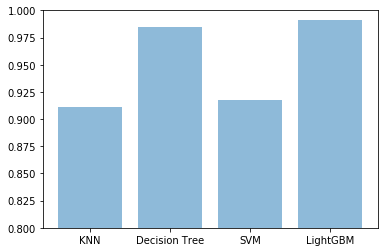

In [18]:
horizontal = ['KNN','Decision Tree','SVM','LightGBM']
plt.ylim(0.8,1.0)
plt.bar(horizontal, all_accuracies, align='center', alpha=0.5)


__This is the result of the algorithms we applied. As you can see the LightGBM algorithms works best with accuracy of 0.99__